# 배깅과 랜덤포레스트

In [72]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# 경고끄기
import warnings
warnings.filterwarnings('ignore')

In [73]:
df_cencus = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/census_c.csv')

In [74]:
df_cencus.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = df_cencus.iloc[:,:-1].to_numpy() 
Y = df_cencus.iloc[:,-1].to_numpy()

In [76]:
rf = RandomForestClassifier(n_estimators=10,random_state=2,n_jobs=-1)
scores =  cross_val_score(rf,X,Y,cv=5)
scores

array([0.85091356, 0.84413391, 0.85135135, 0.85211916, 0.85058354])

In [77]:
np.round(np.mean(scores),3)

0.85

In [78]:
# 바이크
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/bike.csv'
bike = pd.read_csv(url)

In [79]:
bike.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [80]:
#dteday , casual registered
bike_df = bike.drop(columns=['instant','dteday','casual','registered'])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [21]:
# (bike_df['instant'].value_counts()>2).sum()

In [81]:
bike_df.isnull().mean()
bike_df = bike_df.dropna()

In [82]:
X = bike_df.iloc[:,:-1].to_numpy()
Y = bike_df.iloc[:,-1].to_numpy()

In [83]:
len(X)

721

In [39]:
from sklearn.ensemble import RandomForestRegressor
#객체
rf =  RandomForestRegressor(n_estimators=10,random_state=2,n_jobs=-1)

In [43]:
# 평균 제곱오차를 사용해서 교차 검증을 수행
scores = cross_val_score(rf, X,Y,scoring='neg_mean_squared_error', cv=10)
# 오차의 제곱근을 계산
rmse = np.sqrt(-scores)
np.round(rmse,3)

array([ 914.262,  712.118,  515.229,  918.126,  937.395, 1090.845,
       1043.243,  790.62 ,  904.159, 1218.408])

In [45]:
np.round(np.mean(rmse),3)

904.441

# 랜덤 포레스트 매개변수

In [48]:
rf = RandomForestRegressor(oob_score=True, n_estimators=10, random_state=2,n_jobs=-1)
rf.fit(X,Y)

RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True,
                      random_state=2)

In [49]:
rf.oob_score_

0.790855183593731

In [50]:
rf = RandomForestRegressor(oob_score=True, n_estimators=50, random_state=2,n_jobs=-1)
rf.fit(X,Y)
rf.oob_score_

0.8759505358882941

In [51]:
rf = RandomForestRegressor(oob_score=True, n_estimators=100, random_state=2,n_jobs=-1)
rf.fit(X,Y)
rf.oob_score_

0.879427405444168

In [53]:
# 최적의 파라메터 찾기
x_cencus = df_cencus.iloc[:,:-1].to_numpy()
y_cencus = df_cencus.iloc[:,-1].to_numpy()

In [64]:
# matplotlib
import matplotlib.pyplot as plt
# seaboar
import seaborn as sns
# sns darkgird 로 설정
sns.set()
# 빈 oob_scores
oob_scores = []
rfc = RandomForestClassifier(n_estimators=50,warm_start=True,oob_score=True,n_jobs=-1,random_state=2)
# 훈련
rfc.fit(x_cencus,y_cencus)
oob_scores.append(rfc.oob_score_)
# 초기화
est = 50
estimators = [est]
# 0 ~15까지 반복
for i in range(15):
    est += 50
    estimators.append(est)
    rfc.set_params(n_estimators = est)
    rfc.fit(x_cencus,y_cencus)
    oob_scores.append(rfc.oob_score_)

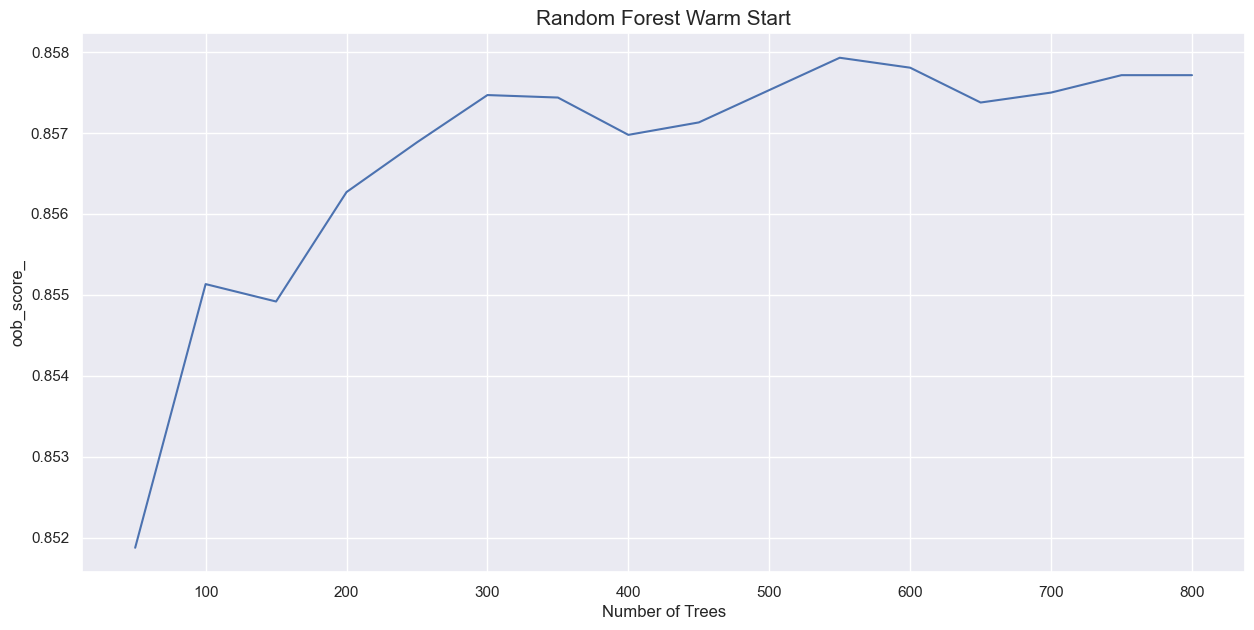

In [65]:
# 시각화
# 크기설정
plt.figure(figsize=(15,7))
# estimators, oob_scores 그래프
plt.plot(estimators,oob_scores)
# x 축 레이블
plt.xlabel('Number of Trees')
# y 축 레이블
plt.ylabel('oob_score_')
# title
plt.title('Random Forest Warm Start',fontsize=15)
plt.show()

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [86]:
# 데이터 분할
x_train,x_test,y_train,y_teste =  train_test_split(x_cencus, y_cencus,random_state=2)
etc= ExtraTreesClassifier(n_estimators=550,random_state=2, n_jobs=-1)
scores = cross_val_score(etc,x_train,y_train)
np.mean(scores)

0.8419328419328419

# 랜덤포레스트 성능 높이기

In [88]:
# 바이크
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/bike.csv'
bike = pd.read_csv(url)
bike.drop(columns=['dteday','casual','registered'], inplace=True)

In [92]:
bike.dropna(inplace=True)

In [93]:
x_train,x_test,y_train,y_test = train_test_split(bike.iloc[:,:-1], bike.iloc[:,-1],random_state=2,test_size=0.2)

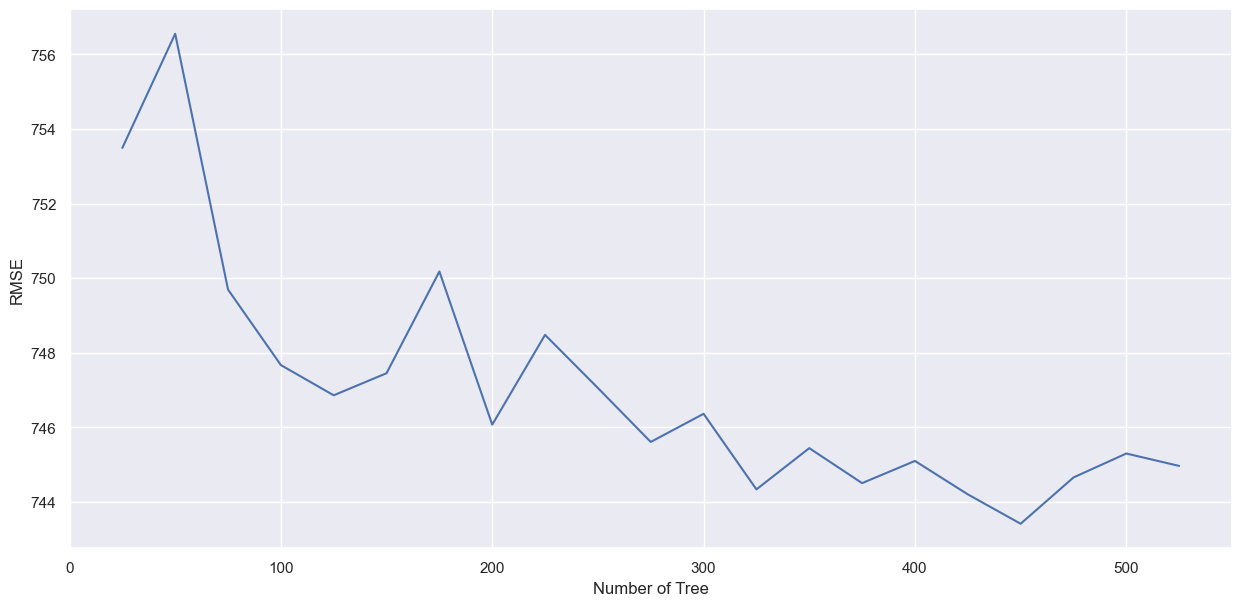

In [98]:
# 측정도구 
from sklearn.metrics import mean_squared_error  # mse
rmse_scores = []
estimaters = [i*25 for i in range(1,22)]
# warm start true로 셋팅
rfr = RandomForestRegressor(warm_start=True, n_jobs=-1, random_state=2)
#시작 트리의 개수
for est in estimaters:
    # n_estimate를 est로 설정
    rfr.set_params(n_estimators = est)
    # 훈련
    rfr.fit(x_train,y_train)
    # rmse 값을 계산    
    rmse = mean_squared_error(y_test, rfr.predict(x_test), squared=False )
    rmse_scores.append(rmse)
plt.figure(figsize=(15,7))
plt.plot(estimaters,rmse_scores)
plt.xlabel('Number of Tree')
plt.ylabel('RMSE')
plt.show()    

In [99]:
# cross_val_score
rfr = RandomForestRegressor(n_estimators=450, n_jobs=-1, random_state=2)
scores = cross_val_score(rfr,x_train,y_train,scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
rmse.mean()

650.4471733088442

# 하이퍼 파라메터 튜닝
# GridSearchCV VS RandomizedSearchCV
    GridSearchCV : 파라메터를 지정하면 모든 조합에대해서 경우의 조합을 다 만들고 교차검증으로 최적의 파라메터를 찾는다
                   시간이 오래걸림
    RandomizedSearchCV : 모든  경우의 조합을 다 시도하지 않고 랜덤하게 적용해서 평가함  
                    시간이 빠르다.


In [ ]:
from sklearn.model_selection  import RandomizedSearchCV
def randomized_search(params, reg,n_iter = 16):
    rsc = RandomizedSearchCV(reg, params, n_iter=n_iter, scoring='neg_mean_squared_error',cv=10,n_jobs=-1, random_state=2)
    rsc.fit(x_train,y_train)
    # 최상의 모델을 추출
    best_model = rsc.best_etsimator_
    best_param = rsc.best_params_
    print(f"best_param : {best_param}")
    best_score = np.sqrt(-rsc.best_score_)
    print(f"훈련점수 : {best_param:.3f}")